In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch 
from torch.utils.data import Dataset, Subset
from torch.utils.data import random_split
from PIL import Image
import os
import numpy as np

In [2]:
transformation = transforms.Compose( [transforms.Resize((32,32)), 
                                          transforms.ToTensor(),
                                          transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                          std=[0.5, 0.5, 0.5])])

#change average sizes
#grabbing dataset
dataset = torchvision.datasets.ImageFolder('dataset', 
                                                transform=transformation)

#randomly splitting for training and testing
training_set, testing_set = random_split(dataset, [2494, 832])


                                                
train_loader = torch.utils.data.DataLoader(training_set, batch_size=100, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(testing_set, batch_size=100, shuffle=True, num_workers=2)


In [3]:
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as td


#building neural network
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layer = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
        nn.BatchNorm2d(32),
        nn.LeakyReLU(inplace=True),
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
        nn.BatchNorm2d(32),
        nn.LeakyReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(inplace=True),
        nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
    )
        self.fc_layer = nn.Sequential(
        nn.Dropout(p=0.1),
        nn.Linear(8 * 8 * 64, 1000),
        nn.ReLU(inplace=True),
        nn.Linear(1000, 512),
        nn.ReLU(inplace=True),
        nn.Dropout(p=0.1),
        nn.Linear(512, 10)
    )
    def forward(self, x):
        # conv layers
        x = self.conv_layer(x)
        # flatten
        x = x.view(x.size(0), -1)
        # fc layer
        x = self.fc_layer(x)
        return x


In [4]:
num_epochs = 10
num_classes = 10
learning_rate = 0.001


In [5]:
#initializing CNN
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=1e-5)

In [6]:
#training the model
total_step = len(train_loader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())
        # Backprop and optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Train accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)
    print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
        .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
        (correct / total) * 100))

Epoch [1/10], Step [25/25], Loss: 1.7362, Accuracy: 36.17%
Epoch [2/10], Step [25/25], Loss: 1.4554, Accuracy: 44.68%
Epoch [3/10], Step [25/25], Loss: 1.3326, Accuracy: 50.00%
Epoch [4/10], Step [25/25], Loss: 1.4217, Accuracy: 48.94%
Epoch [5/10], Step [25/25], Loss: 0.9106, Accuracy: 65.96%
Epoch [6/10], Step [25/25], Loss: 0.9837, Accuracy: 57.45%
Epoch [7/10], Step [25/25], Loss: 1.1324, Accuracy: 57.45%
Epoch [8/10], Step [25/25], Loss: 0.7720, Accuracy: 76.60%
Epoch [9/10], Step [25/25], Loss: 0.6382, Accuracy: 74.47%
Epoch [10/10], Step [25/25], Loss: 0.7796, Accuracy: 72.34%


In [7]:
#Saving Model
# path = r"/Users/jgold/Documents/GitHub/Artifical-Intelligence-Project/Models/Model2.pt"

# torch.save(model.state_dict(), path)

In [8]:
#testing the model after it has beeen trained
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        print('Test Accuracy of the model on the 800 test images: {} %'
          .format((correct / total) * 100))

Test Accuracy of the model on the 800 test images: 45.0 %
Test Accuracy of the model on the 800 test images: 48.5 %
Test Accuracy of the model on the 800 test images: 51.33333333333333 %
Test Accuracy of the model on the 800 test images: 52.25 %
Test Accuracy of the model on the 800 test images: 53.0 %
Test Accuracy of the model on the 800 test images: 53.5 %
Test Accuracy of the model on the 800 test images: 54.57142857142857 %
Test Accuracy of the model on the 800 test images: 55.00000000000001 %
Test Accuracy of the model on the 800 test images: 55.40865384615385 %


Time to evaluate our data.
First will be the training data.


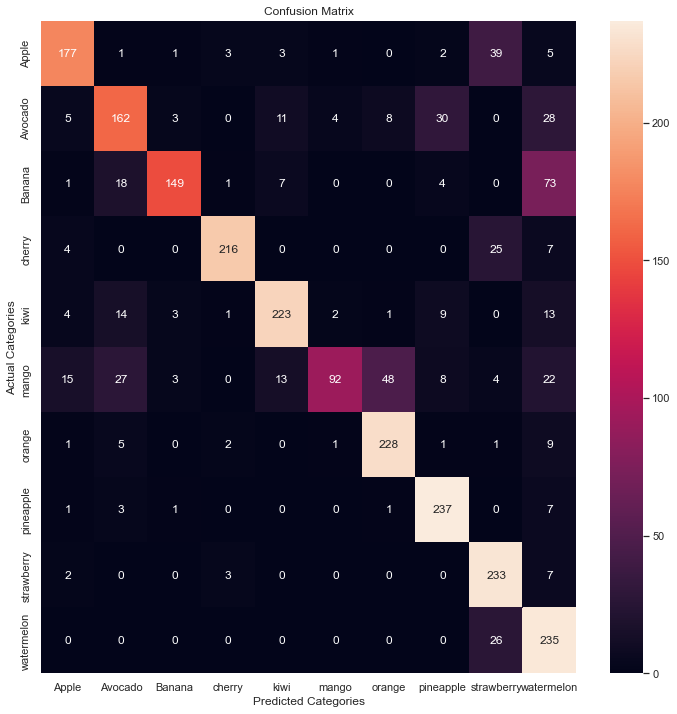

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       210
           1       0.65      0.70      0.67       230
           2       0.59      0.93      0.72       160
           3       0.86      0.96      0.90       226
           4       0.83      0.87      0.85       257
           5       0.40      0.92      0.55       100
           6       0.92      0.80      0.85       286
           7       0.95      0.81      0.88       291
           8       0.95      0.71      0.81       328
           9       0.90      0.58      0.70       406

    accuracy                           0.78      2494
   macro avg       0.78      0.81      0.77      2494
weighted avg       0.83      0.78      0.79      2494



In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

print("Time to evaluate our data.")
print("First will be the training data.")

#building Confusion Matrix as well as getting accuracy, predictions and F1 score for train model
model.eval()
prediction_list = []
accurate_list = []
with torch.no_grad():
    for images, labels in train_loader:
        outputs = model(images)
        _, predicted = torch.max(model(images), 1)
        prediction_list.extend(predicted.detach().cpu().numpy())
        accurate_list.extend(labels.detach().cpu().numpy())
        
sns.set(rc={'figure.figsize':(12,12)})
confusion_matrix_data = confusion_matrix(accurate_list, prediction_list)
confusionMatrix = sns.heatmap(confusion_matrix_data, annot=True, fmt='g' )
confusionMatrix.set_title('Confusion Matrix');
confusionMatrix.set_xlabel('Predicted Categories')
confusionMatrix.set_ylabel('Actual Categories');
confusionMatrix.xaxis.set_ticklabels(['Apple','Avocado','Banana','cherry','kiwi','mango','orange','pineapple','strawberry','watermelon'])
confusionMatrix.yaxis.set_ticklabels(['Apple','Avocado','Banana','cherry','kiwi','mango','orange','pineapple','strawberry','watermelon'])


plt.show()

#printing Accuracy, Prediction and F1 score for training model
print(classification_report(prediction_list, accurate_list))

Now to evaluate the testing data.


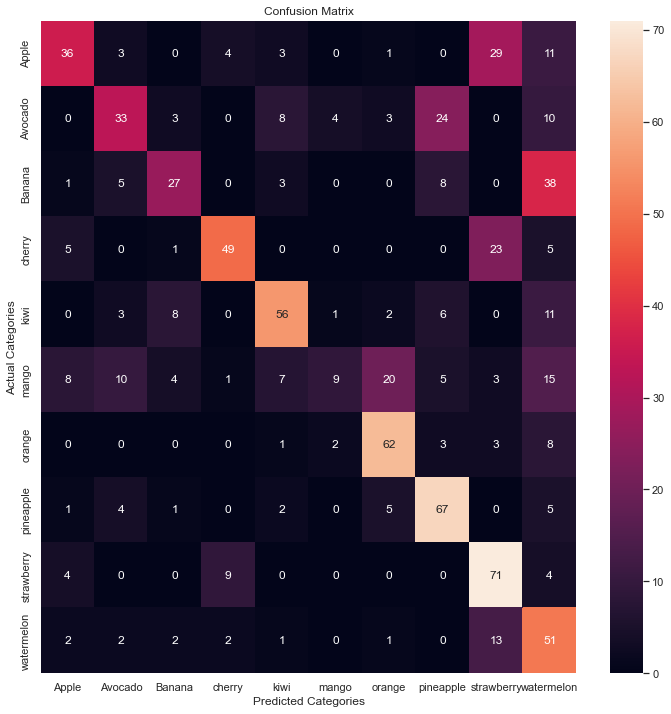

              precision    recall  f1-score   support

           0       0.41      0.63      0.50        57
           1       0.39      0.55      0.46        60
           2       0.33      0.59      0.42        46
           3       0.59      0.75      0.66        65
           4       0.64      0.69      0.67        81
           5       0.11      0.56      0.18        16
           6       0.78      0.66      0.72        94
           7       0.79      0.59      0.68       113
           8       0.81      0.50      0.62       142
           9       0.69      0.32      0.44       158

    accuracy                           0.55       832
   macro avg       0.55      0.59      0.53       832
weighted avg       0.65      0.55      0.57       832



In [10]:
#building Confusion Matrix as well as getting accuracy, predictions and F1 score for test model

print("Now to evaluate the testing data.")
model.eval()
prediction_list = []
accurate_list = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(model(images), 1)
        prediction_list.extend(predicted.detach().cpu().numpy())
        accurate_list.extend(labels.detach().cpu().numpy())

sns.set(rc={'figure.figsize':(12,12)})

confusion_matrix_data = confusion_matrix(accurate_list, prediction_list)
confusionMatrix = sns.heatmap(confusion_matrix_data, annot=True, fmt='g' )
confusionMatrix.set_title('Confusion Matrix');
confusionMatrix.set_xlabel('Predicted Categories')
confusionMatrix.set_ylabel('Actual Categories');
confusionMatrix.xaxis.set_ticklabels(['Apple','Avocado','Banana','cherry','kiwi','mango','orange','pineapple','strawberry','watermelon'])
confusionMatrix.yaxis.set_ticklabels(['Apple','Avocado','Banana','cherry','kiwi','mango','orange','pineapple','strawberry','watermelon'])

  
plt.show()

#printing Accuracy, Prediction and F1 score for testing model
print(classification_report(prediction_list, accurate_list))

In [ ]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

full_dataset = torchvision.datasets.ImageFolder('dataset', 
                                                transform=transformation)

full_loader=torch.utils.data.DataLoader(full_dataset, batch_size=1000, shuffle=True, num_workers=2)

kfold = KFold(n_splits=10, shuffle=True, random_state=None)
fold_value = 1
for training_id, testing_id in kfold.split(dataset):
   
    print("Fold Number:", fold_value)
    training_dataset = Subset(dataset, training_id)
    testing_dataset = Subset(dataset, testing_id)
    train_loader = torch.utils.data.DataLoader(training_dataset, batch_size=1000, shuffle=True, num_workers=2)
    test_loader = torch.utils.data.DataLoader(testing_dataset, batch_size=1000, shuffle=True, num_workers=2)
    total_step = len(train_loader)
    loss_list = []
    acc_list = []
    model = CNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    num_epochs = 10
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss_list.append(loss.item())
            # Backprop and optimisation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # Train accuracy
            total = labels.size(0)
            _, predicted = torch.max(outputs.data, 1)
            correct = (predicted == labels).sum().item()
            acc_list.append(correct / total)
        print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
            .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
            (correct / total) * 100))
    model.eval()
    prediction_list = []
    accurate_list = []
    with torch.no_grad():
        for images, labels in full_loader:
            outputs = model(images)
            _, predicted = torch.max(model(images), 1)
            prediction_list.extend(predicted.detach().cpu().numpy())
            accurate_list.extend(labels.detach().cpu().numpy())
    print(classification_report(prediction_list, accurate_list))
    fold_value+=1



Fold Number: 1
Epoch [1/10], Step [3/3], Loss: 2.4379, Accuracy: 21.65%
Epoch [2/10], Step [3/3], Loss: 1.8737, Accuracy: 31.52%
Epoch [3/10], Step [3/3], Loss: 1.6856, Accuracy: 34.14%
Epoch [4/10], Step [3/3], Loss: 1.5991, Accuracy: 37.87%
Epoch [5/10], Step [3/3], Loss: 1.5183, Accuracy: 43.10%
Epoch [6/10], Step [3/3], Loss: 1.4376, Accuracy: 46.93%
Epoch [7/10], Step [3/3], Loss: 1.3820, Accuracy: 48.44%
Epoch [8/10], Step [3/3], Loss: 1.3631, Accuracy: 50.55%
Epoch [9/10], Step [3/3], Loss: 1.2168, Accuracy: 55.59%
Epoch [10/10], Step [3/3], Loss: 1.1835, Accuracy: 56.50%
              precision    recall  f1-score   support

           0       0.12      0.88      0.20        42
           1       0.34      0.59      0.43       190
           2       0.24      0.65      0.36       126
           3       0.49      0.81      0.61       204
           4       0.62      0.53      0.57       420
           5       0.26      0.42      0.33       196
           6       0.84      0.58  